In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

從網頁讀取資料

In [33]:
url ='https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train=df_train.drop(labels=['Id'],axis=1)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
label_define={'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_train['Class']=df_train['Species'].map(label_define)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [35]:
X=df_train.drop(labels=['Species','Class'],axis=1).values #刪去字母欄位"Species"
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


In [36]:
import numpy as np
np.set_printoptions(suppress=True)#減少小數位數


By標準差

In [37]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler().fit(X) #找出每個欄位的平均值平方差 有mean_ var_等可以使用
X_scaled = scaler.transform(X)
print('mean(X):',X.mean(axis=0))
print('std(X):',X.std(axis=0))
print('scaler(mean(X)):',X_scaled.mean(axis=0))
print('scaler(std(X)):',X_scaled.std(axis=0))

mean(X): [5.84333333 3.054      3.75866667 1.19866667]
std(X): [0.82530129 0.43214658 1.75852918 0.76061262]
scaler(mean(X)): [-0. -0.  0. -0.]
scaler(std(X)): [1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

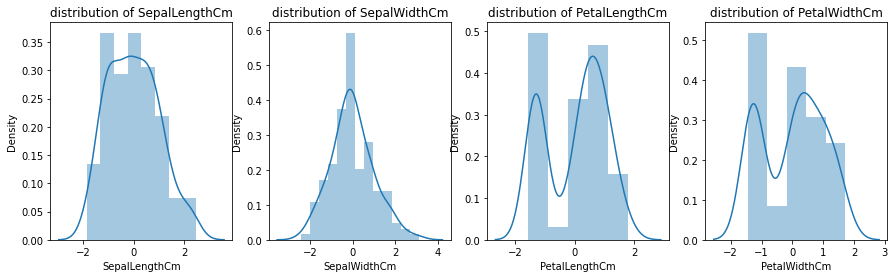

In [41]:
fig,axes=plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])
axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


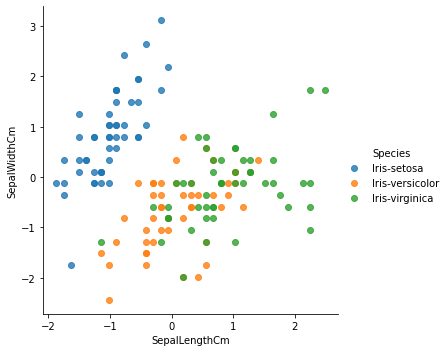

In [42]:
X_scaled=pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_scaled['Species']=df_train['Species']
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=X_scaled,fit_reg=False)

By最大最小值

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)
print('mean(X):',X.mean(axis=0))
print('std(X):',X.std(axis=0))
print('mean(X_scaler):',X_scaled.mean(axis=0))
print('std(X_scaler):',X_scaled.std(axis=0))

mean(X): [5.84333333 3.054      3.75866667 1.19866667]
std(X): [0.82530129 0.43214658 1.75852918 0.76061262]
mean(X_scaler): [0.4287037  0.43916667 0.46757062 0.45777778]
std(X_scaler): [0.22925036 0.18006108 0.29805579 0.31692192]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

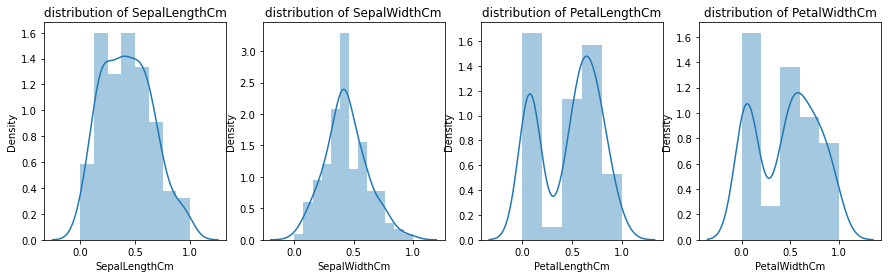

In [51]:
fig,axes=plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])
axes[0].set(xlabel="SepalLengthCm",title="distribution of SepalLengthCm")
axes[1].set(xlabel="SepalWidthCm",title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


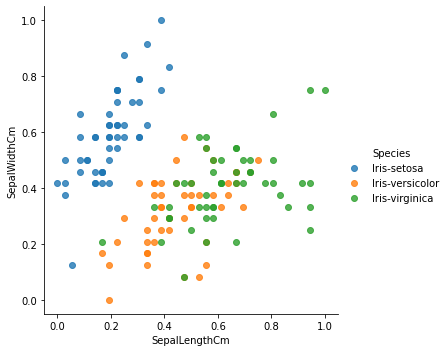

In [55]:
X_scaled=pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_scaled['Species']=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=X_scaled,fit_reg=False)

By最大絕對值

In [56]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler().fit(X)
X_scaled=scaler.transform(X)

print('mean(X):',X.mean(axis=0))
print('std(X):',X.std(axis=0))
print('mean(X_scaler):',X_scaled.mean(axis=0))
print('std(X_scaler):',X_scaled.std(axis=0))

mean(X): [5.84333333 3.054      3.75866667 1.19866667]
std(X): [0.82530129 0.43214658 1.75852918 0.76061262]
mean(X_scaler): [0.73966245 0.69409091 0.5447343  0.47946667]
std(X_scaler): [0.10446852 0.09821513 0.2548593  0.30424505]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

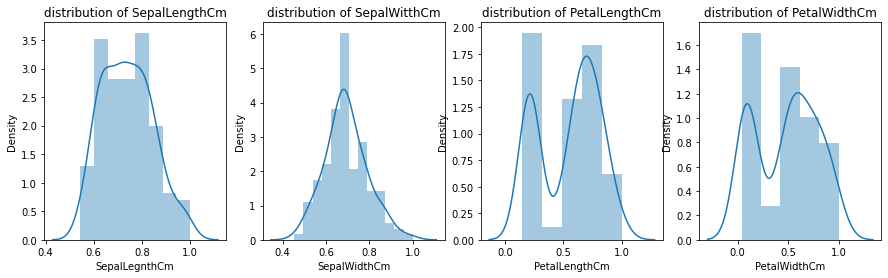

In [57]:
fig,axes=plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel="SepalLegnthCm",title="distribution of SepalLengthCm")
axes[1].set(xlabel="SepalWidthCm",title="distribution of SepalWitthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


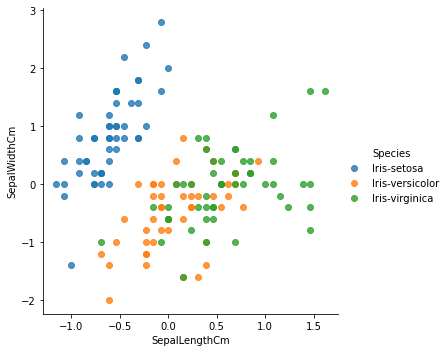

In [59]:
X_scaled=pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_scaled['Species']=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=X_scaled,fit_reg=False)

In [65]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)

print('mean(X):',X.mean(axis=0))
print('std(X):',X.std(axis=0))
print('mean(X_scaler):',X_scaled.mean(axis=0))
print('std(X_scaler):',X_scaled.std(axis=0))



mean(X): [5.84333333 3.054      3.75866667 1.19866667]
std(X): [0.82530129 0.43214658 1.75852918 0.76061262]
mean(X_scaler): [ 0.03333333  0.108      -0.16895238 -0.06755556]
std(X_scaler): [0.63484715 0.86429316 0.50243691 0.50707508]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

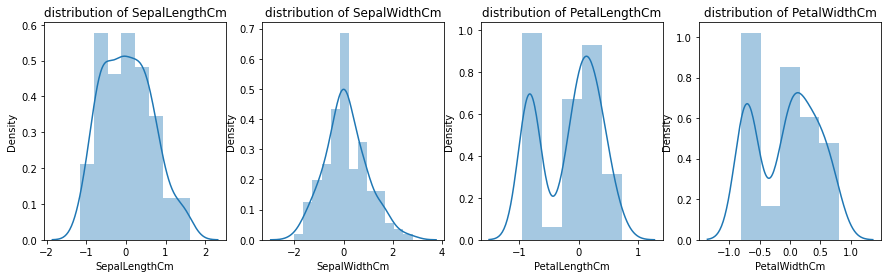

In [66]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


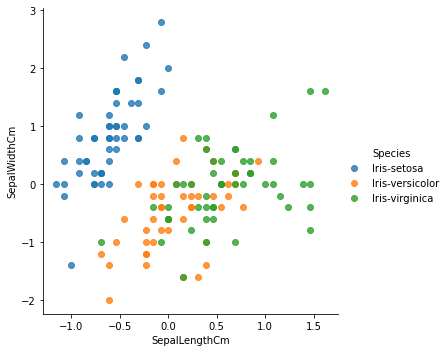

In [67]:
X_scaled=pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_scaled['Species']=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=X_scaled,fit_reg=False)